In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv("Group_4_data_cleaned.csv",index_col=0)
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5.0,7,35,1.400,0.400,0.657,2.33,14,23.0,6.0,1
1,6.0,7,42,1.167,0.429,0.881,3.60,18,37.0,5.0,1
2,6.0,18,108,3.000,0.287,0.741,4.43,31,80.0,7.0,1
3,5.0,7,35,1.400,0.371,0.743,4.33,13,26.0,3.0,1
4,6.0,3,18,0.500,0.500,0.944,2.25,9,17.0,4.0,1


In [30]:
print(df.describe())
print(df.info())

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

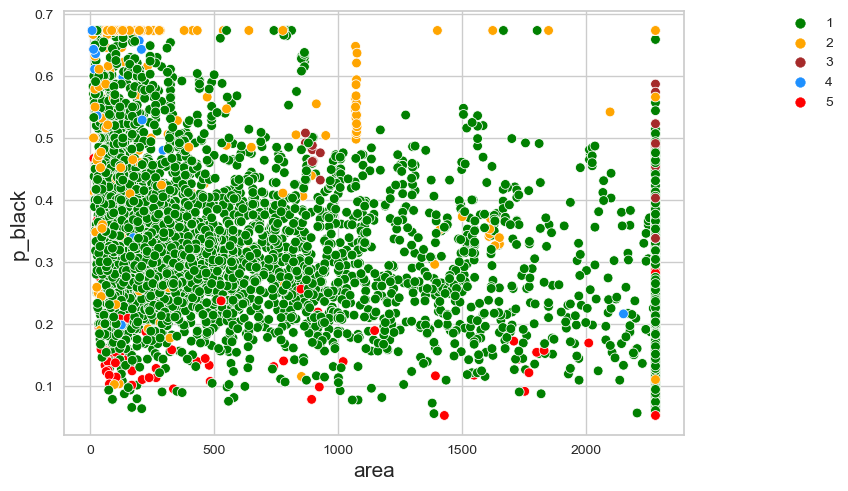

In [31]:
sns.scatterplot(data = df, x = 'area', y='p_black', hue ='y',palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xlabel('area', fontsize=15)
plt.ylabel('p_black', fontsize=15);

In [32]:
scaler = MinMaxScaler()

for i in df.drop(['y'],axis=1).columns:
    scaler.fit(df[[i]])
    df[i] = scaler.transform(df[[i]])


In [33]:
X = df.drop(['y'],axis=1)

y = df['y']

In [34]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)
inertia

[4917.870447264171,
 2423.625463053042,
 1989.8010025062404,
 1667.5772353665832,
 1471.4227016150471,
 1275.9434218607623,
 1179.9361198646395,
 1108.1088688853768,
 1031.5383285431494,
 965.047715887461,
 912.0480500894419,
 857.9590940607844,
 813.8752038177868,
 776.202097488017,
 747.3611119189749]

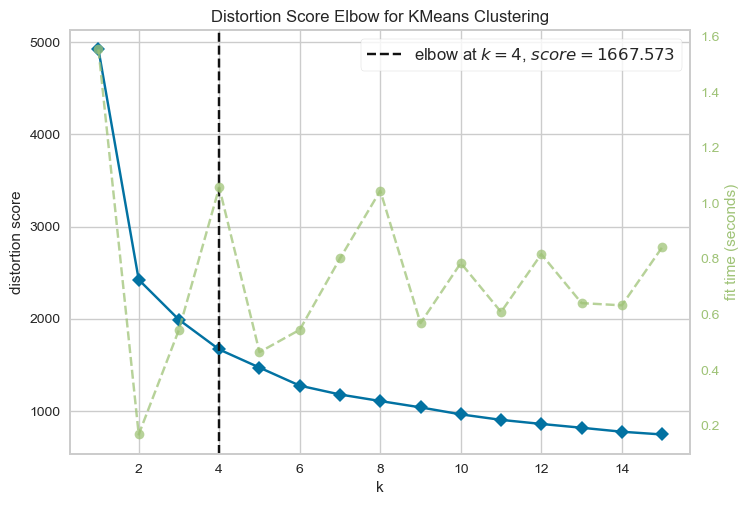

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from  yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(X)
visualizer.show()

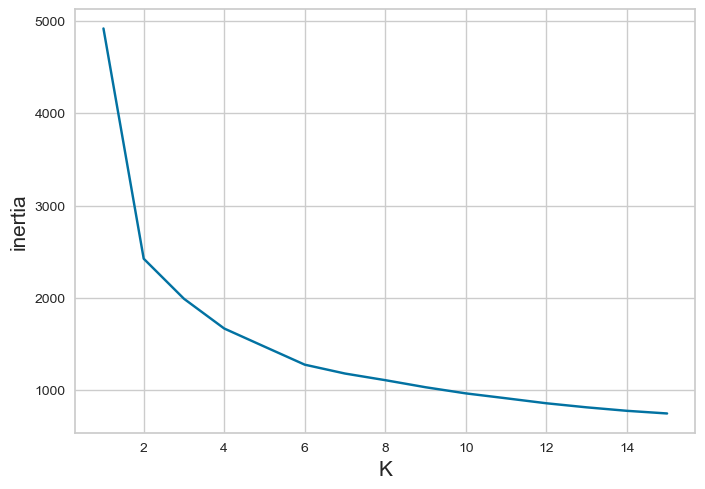

In [36]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

In [37]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000, n_init=10).fit(X)

In [38]:
cluster = kmeans.predict(X)
cluster

array([0, 3, 3, ..., 2, 0, 3])

In [39]:
df['Cluster'] = cluster
df

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y,Cluster
0,0.208333,0.024896,0.012324,0.045167,0.559936,0.505051,0.325581,0.010938,0.009723,0.017331,1,0
1,0.291667,0.024896,0.015405,0.037612,0.606597,0.828283,0.636475,0.017188,0.018232,0.013865,1,3
2,0.291667,0.070539,0.044454,0.097046,0.378117,0.626263,0.839657,0.037500,0.044363,0.020797,1,3
3,0.208333,0.024896,0.012324,0.045167,0.513274,0.629149,0.815177,0.009375,0.011547,0.006932,1,3
4,0.291667,0.008299,0.004842,0.015985,0.720837,0.919192,0.305998,0.003125,0.006077,0.010399,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5468,0.125000,1.000000,0.919454,1.000000,0.788415,0.427128,1.000000,1.000000,0.763902,0.093588,2,1
5469,0.375000,0.012448,0.009243,0.018287,1.000000,0.897547,1.000000,0.020312,0.011547,0.003466,1,3
5470,0.291667,0.390041,0.247799,0.513148,0.399035,0.871573,0.156671,0.256250,0.311152,0.357019,1,2
5471,0.375000,0.165975,0.123239,0.189683,0.259051,0.712843,0.088127,0.084375,0.135521,0.152513,1,0


In [40]:
kmeans.labels_

array([0, 3, 3, ..., 2, 0, 3])

In [41]:
kmeans.cluster_centers_

array([[0.43317958, 0.11181884, 0.09145315, 0.13790289, 0.4572312 ,
        0.75386336, 0.23106858, 0.09703702, 0.10093568, 0.12288654],
       [0.7380618 , 0.89577603, 0.94976707, 0.69813651, 0.39620617,
        0.53066459, 0.45496679, 0.89799508, 0.92884612, 0.89642475],
       [0.53327172, 0.46243318, 0.43567761, 0.43020163, 0.4009492 ,
        0.62134949, 0.3147544 , 0.43868126, 0.42250781, 0.4343103 ],
       [0.41081964, 0.12809564, 0.06638225, 0.26584348, 0.81286354,
        0.75590655, 0.93980475, 0.12549384, 0.0706597 , 0.03644554]])

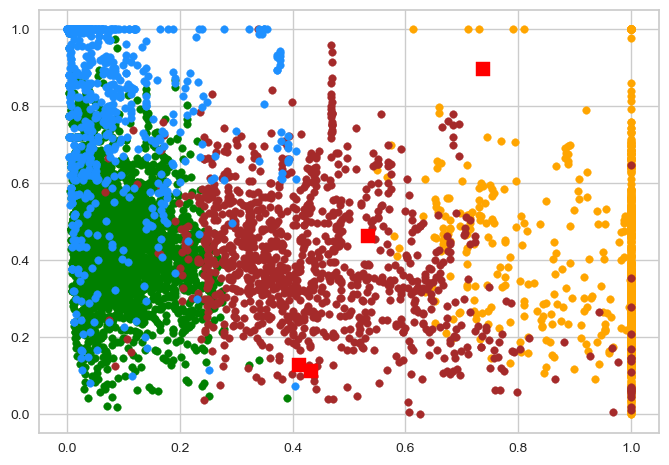

In [42]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['green','orange','brown','dodgerblue','pink','purple', 'blue', 'yellow']

for label, color in zip(labels, colors):
    index = df["Cluster"]==label
    plt.scatter(df.loc[index, "area"],
                df.loc[index, "p_black"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);

In [43]:
kmeans.transform(X)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[0.42571844, 2.18926466, 1.09116913, 0.79034455],
       [0.51061464, 2.19471276, 1.13448414, 0.48406384],
       [0.66007312, 2.12323409, 1.10770174, 0.52058047],
       ...,
       [0.64017325, 1.50717093, 0.49502836, 1.07355375],
       [0.27135566, 1.90720088, 0.7972292 , 1.03200688],
       [1.01000746, 2.36952537, 1.45608568, 0.45987737]])

In [44]:
kmeans.inertia_

1667.5772353665832

In [45]:
kmeans.score(X)

-1667.5772353665832

In [46]:
silhouette_samples(X, kmeans.labels_)

array([ 0.45085303, -0.21333704, -0.07384417, ...,  0.03334026,
        0.52232484,  0.30236919])

In [47]:
silhouette_score(X, kmeans.labels_)

0.35373807632194176

Text(0, 0.5, 'Silhouette Score')

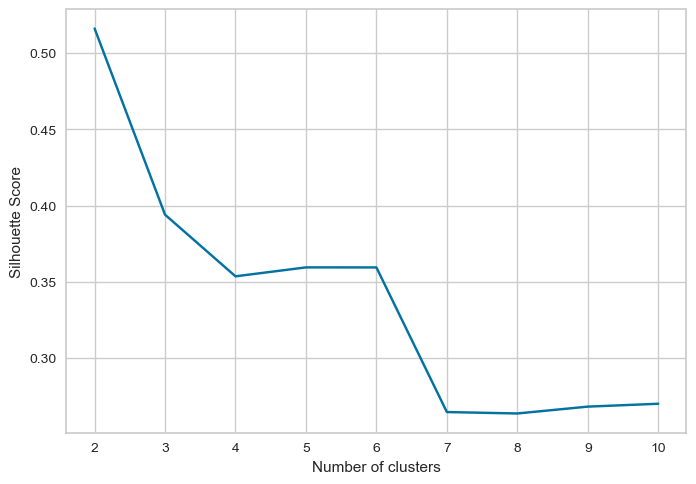

In [48]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    km = KMeans(n_clusters = k).fit(X)
    sil.append(silhouette_score(X, km.labels_, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

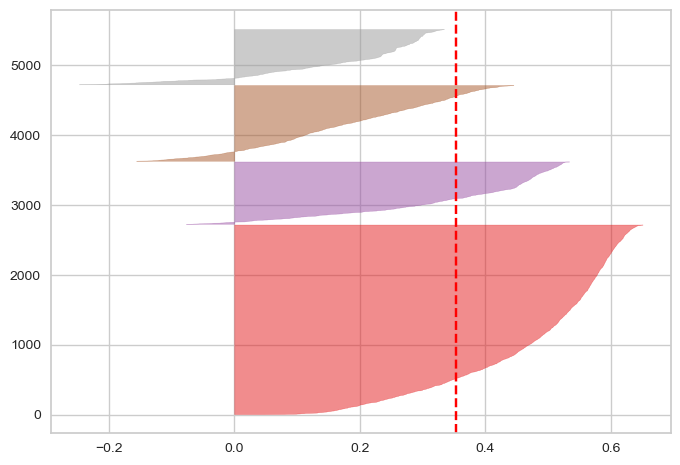

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X);

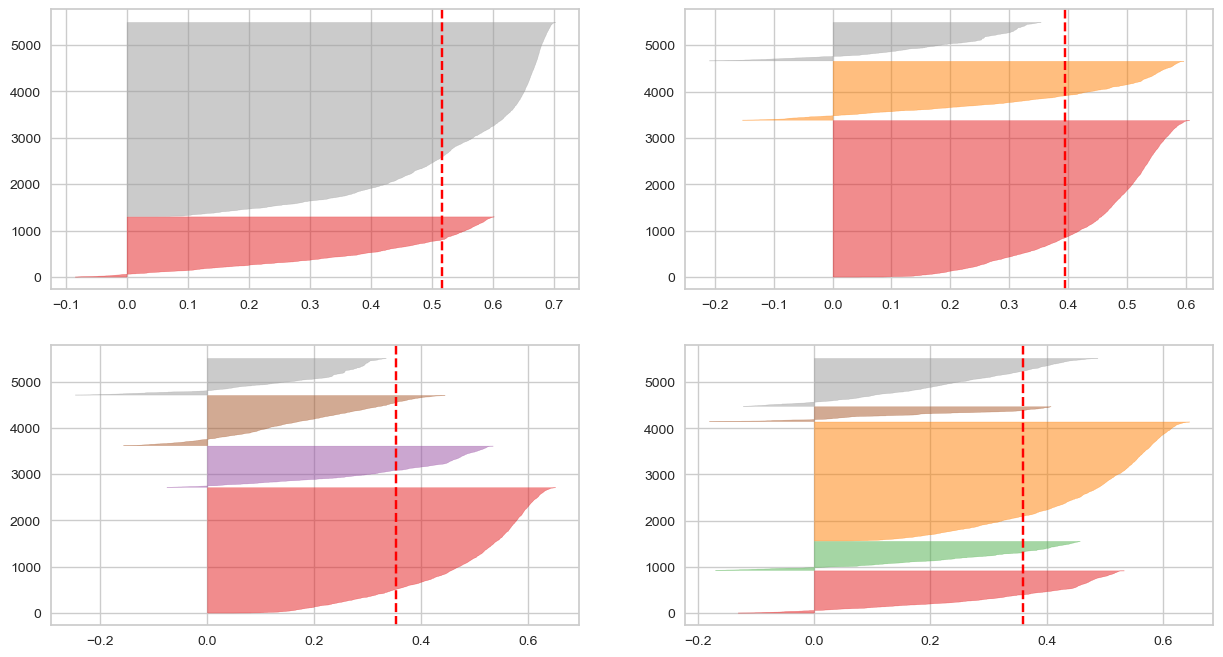

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

# PCA

In [51]:
from sklearn.decomposition import PCA

pca_=PCA(n_components=2,random_state=0)
pca_.fit(X)
pca_xnorm=pca_.transform(X)

Text(0.5, 0, 'PCA Comp 2')

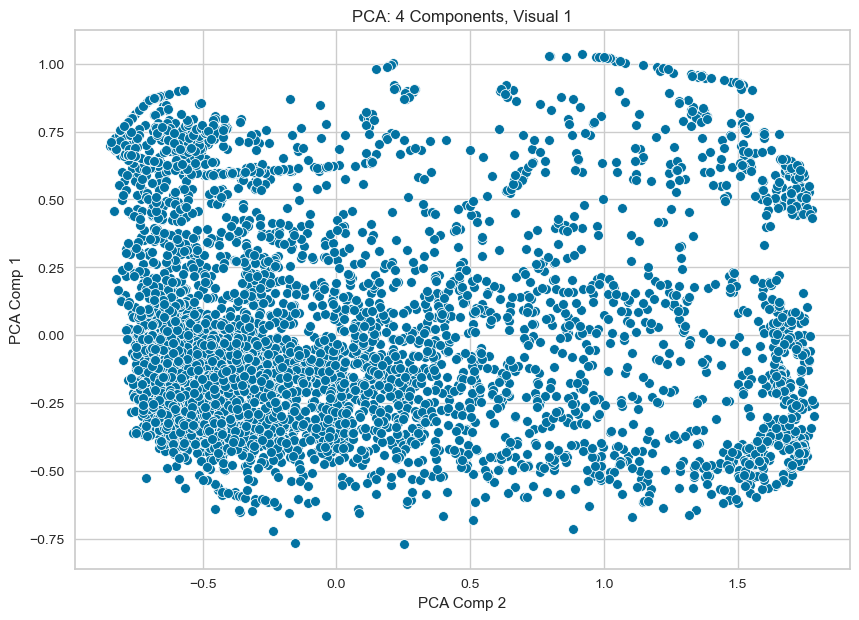

In [52]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_xnorm[:,0],y=pca_xnorm[:,1],s=50)
plt.title('PCA: 4 Components, Visual 1') #title
plt.ylabel('PCA Comp 1') #x label
plt.xlabel('PCA Comp 2') #y label

Text(0, 0.5, 'PC 2')

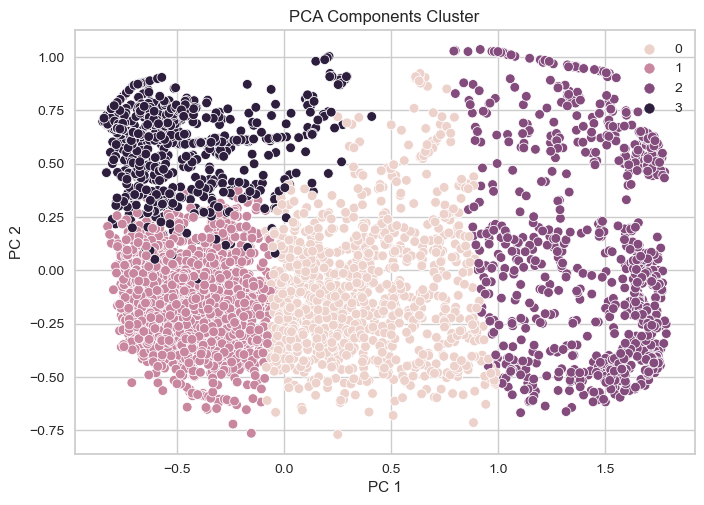

In [53]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000, n_init=10).fit(X)
sns.scatterplot(data = pca_xnorm, x=pca_xnorm[:,0],y=pca_xnorm[:,1],hue=kmeans.labels_)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('PC 1')
# Set y-axis label
plt.ylabel('PC 2')

In [54]:
print(X.head)

<bound method NDFrame.head of         height    length      area     eccen   p_black     p_and   mean_tr  \
0     0.208333  0.024896  0.012324  0.045167  0.559936  0.505051  0.325581   
1     0.291667  0.024896  0.015405  0.037612  0.606597  0.828283  0.636475   
2     0.291667  0.070539  0.044454  0.097046  0.378117  0.626263  0.839657   
3     0.208333  0.024896  0.012324  0.045167  0.513274  0.629149  0.815177   
4     0.291667  0.008299  0.004842  0.015985  0.720837  0.919192  0.305998   
...        ...       ...       ...       ...       ...       ...       ...   
5468  0.125000  1.000000  0.919454  1.000000  0.788415  0.427128  1.000000   
5469  0.375000  0.012448  0.009243  0.018287  1.000000  0.897547  1.000000   
5470  0.291667  0.390041  0.247799  0.513148  0.399035  0.871573  0.156671   
5471  0.375000  0.165975  0.123239  0.189683  0.259051  0.712843  0.088127   
5472  0.458333  0.000000  0.000440  0.003826  1.000000  1.000000  1.000000   

      blackpix  blackand  wb_tran